2\.1\.1\. Загрузить большую (с $N>200$) внешнюю сеть.

In [328]:
import collections
import matplotlib.pyplot as plt
import networkx as nx

In [329]:
filePath = r"C:\Users\timha\OneDrive\Рабочий стол\arenas-email\out.arenas-email" 

2.1.2. Построить фукнцию распределения степеней (в обычных и логарифимических (по 1й и по 2м осям) системах координат) узлов для визуализированных графиков.

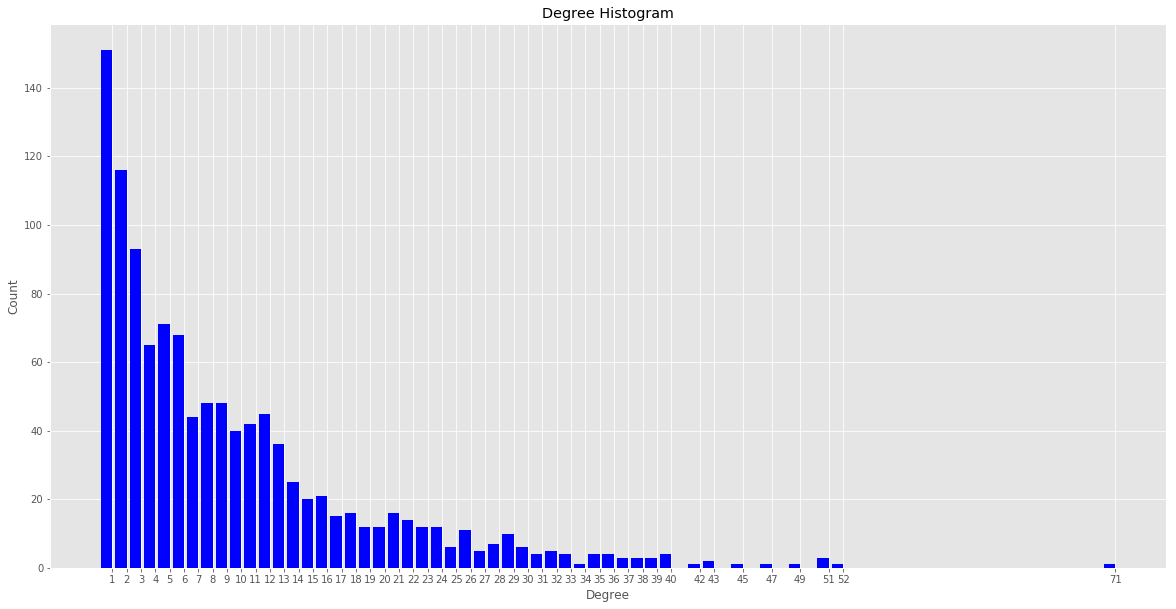

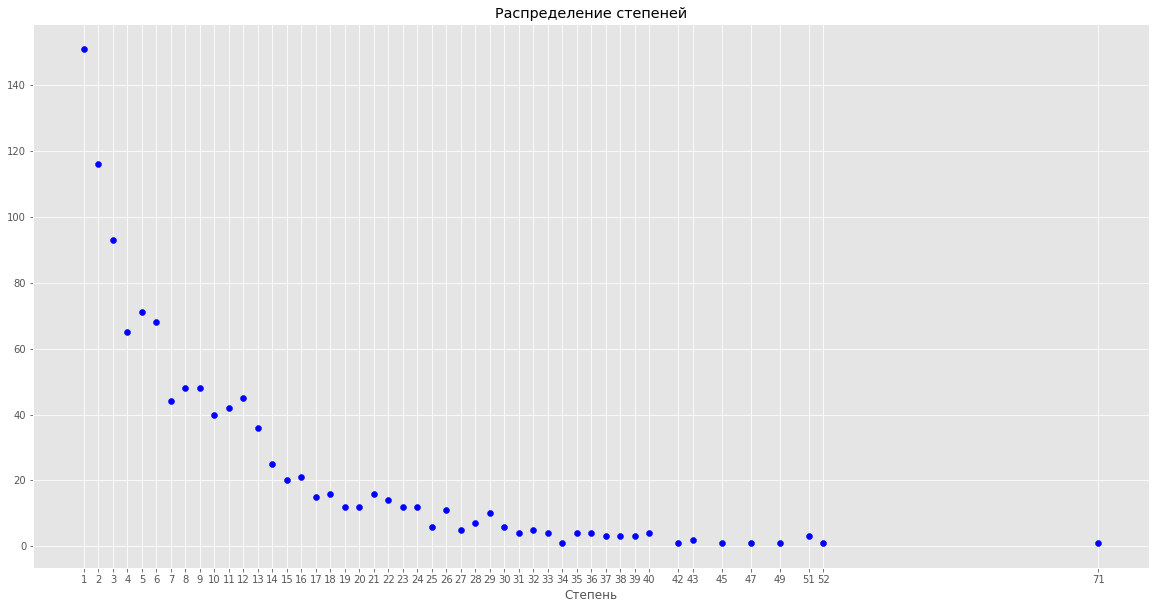

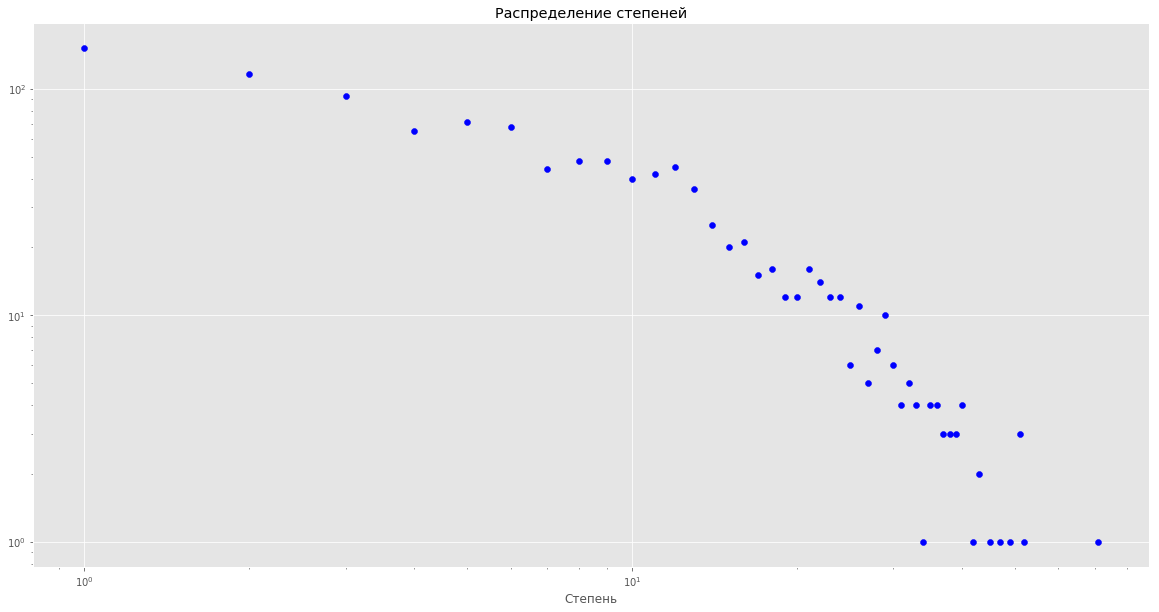

In [330]:
G = nx.read_edgelist(filePath, comments='%', nodetype=int)

degree_sequence = sorted([d for n, d in G.degree()])
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(20,10))
ax.bar(deg, cnt, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# обычная система координат
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(deg, cnt, color='b', marker="o")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)
plt.title("Распределение степеней")
plt.xlabel("Степень")
plt.show()
# логарифмическая система координат
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(deg, cnt, color='b', marker="o")
plt.xscale('log')
plt.yscale('log')
plt.title("Распределение степеней")
plt.xlabel("Степень")
plt.show()

2.1.3. Построить кумулятивный график распределения.

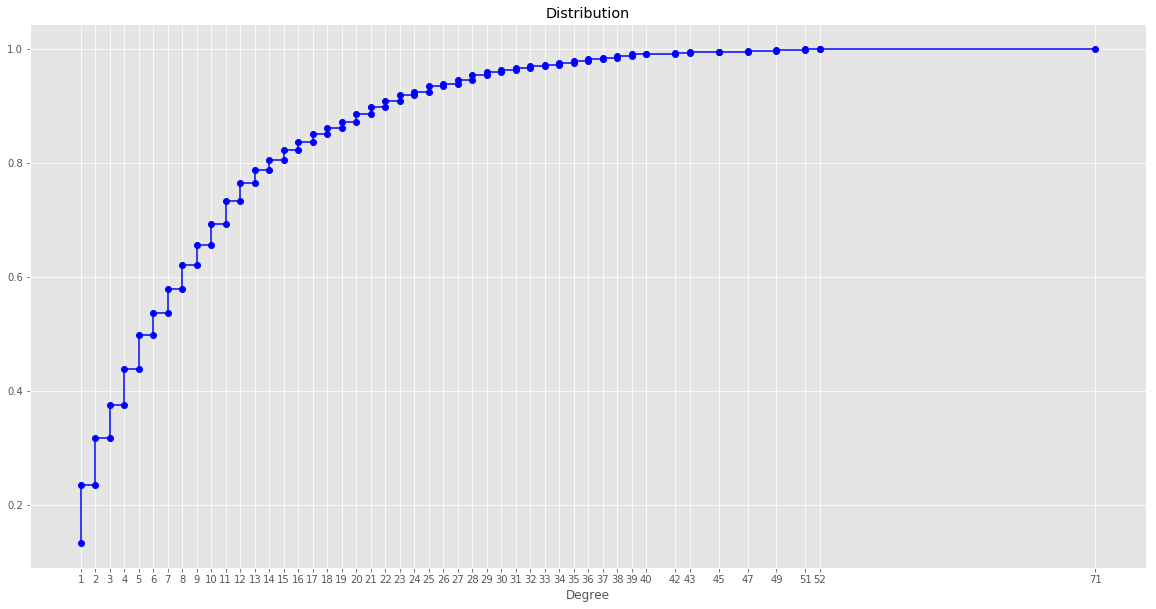

In [331]:
# кумулятивный график распределения
n = sum(cnt)
probs = [i/n for i in cnt]
cum_prob = []
prob_sum = 0
for prob in probs:
    prob_sum += prob
    cum_prob.append(prob_sum)
fig, ax = plt.subplots(figsize=(20,10))
plt.step(deg, cum_prob, color='b', marker="o")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)
plt.title("Distribution")
plt.xlabel("Degree")
plt.show()

2.1.4. Построить распределение с log-binning.

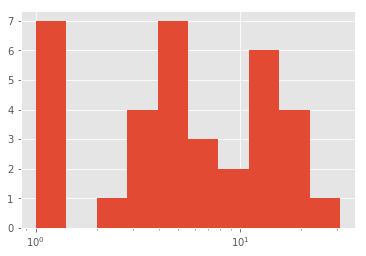

In [332]:
hist, bins = np.histogram(cnt, bins=10)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[2]), len(bins))
plt.hist(cnt, bins=logbins)
plt.xscale('log')

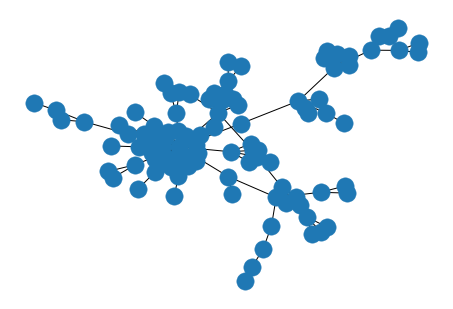

In [333]:
# 2.2.1 С помощью реализации модели предпочтительного присоединения Барабаши-Альберта построить сеть с N>50 .
# Визуализировать ее.
Gr = nx.barabasi_albert_graph(100, 1)
pos
nx.draw(Gr)
plt.show()

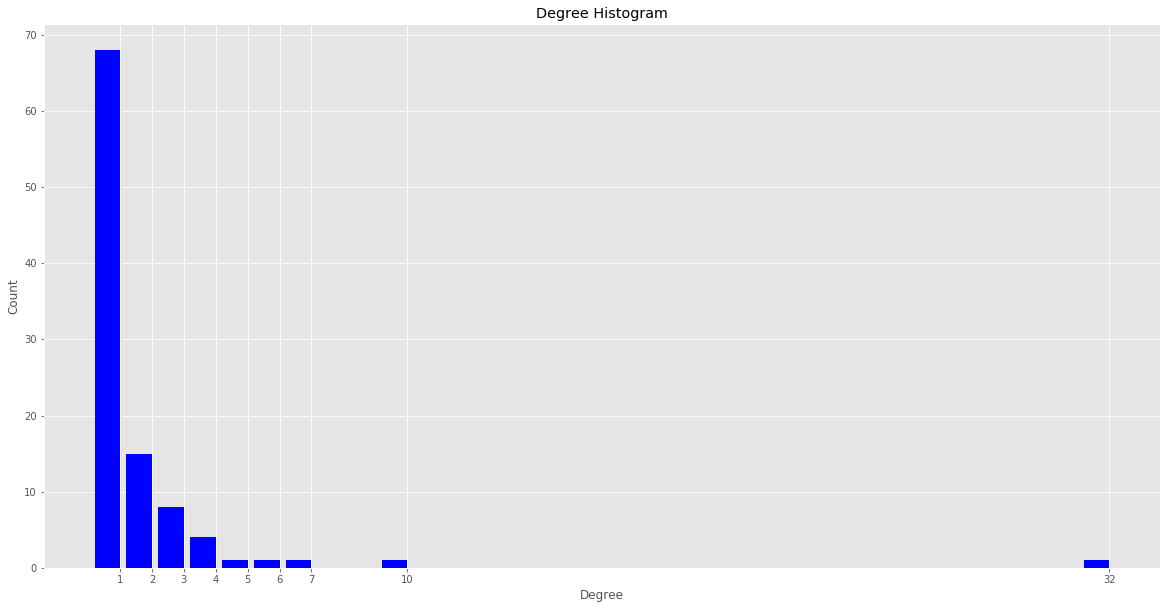

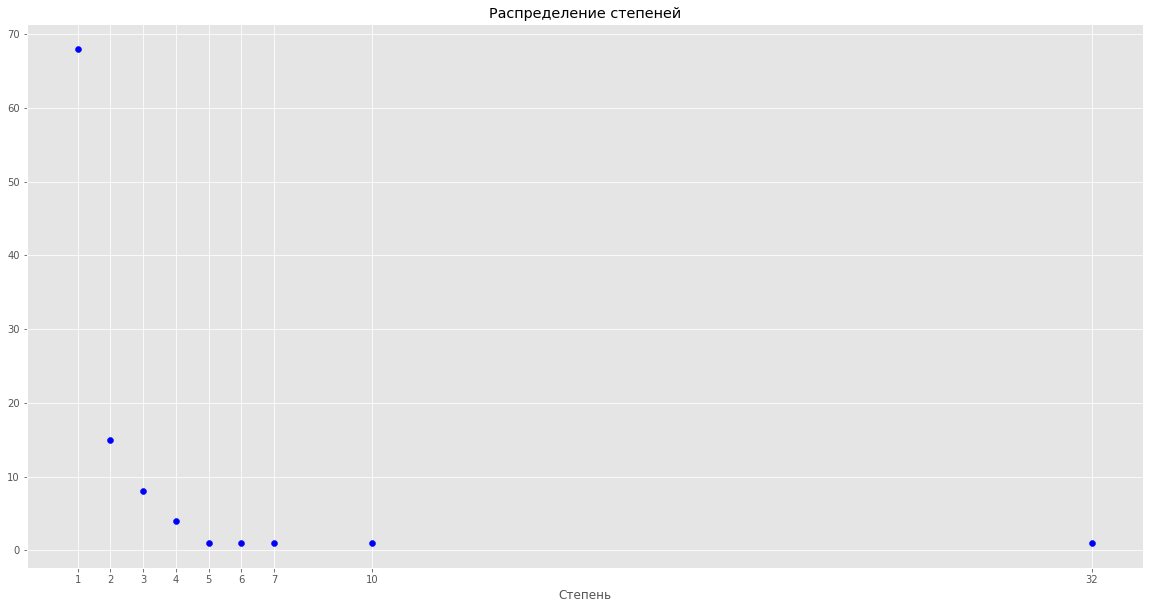

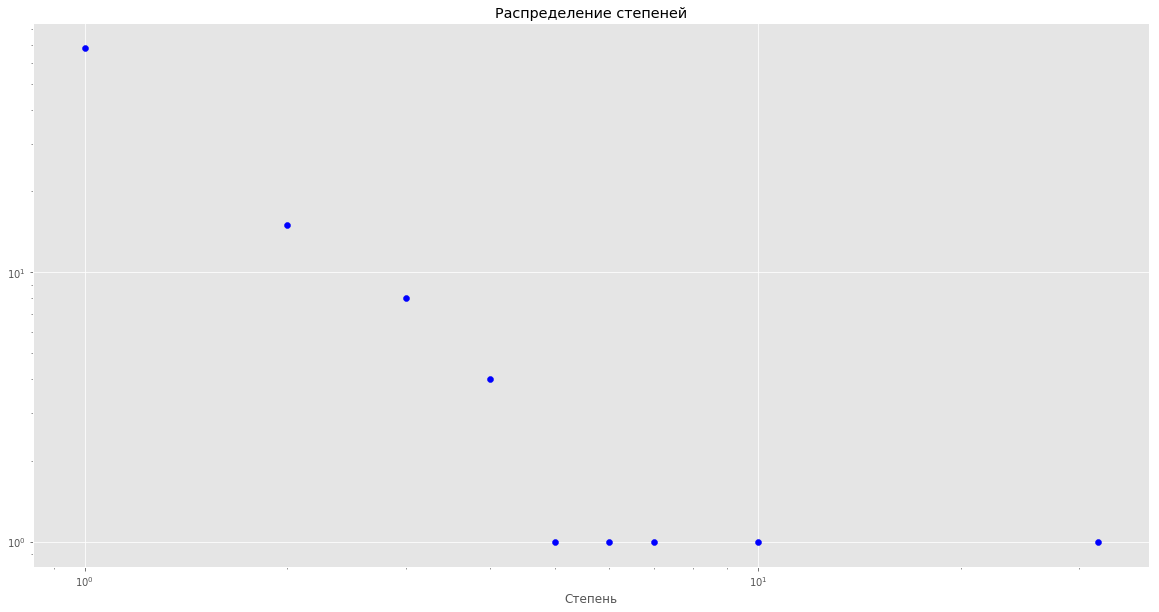

In [334]:
# 2.2.2. Построить фукнцию распределения степеней узлов (в обычных и логарифимических (по 1й и по 2м осям) системах координат)
# для сети из 2.2.1. .
degree_sequence = sorted([d for n, d in Gr.degree()])
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(20,10))
ax.bar(deg, cnt, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# обычная система координат
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(deg, cnt, color='b', marker="o")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)
plt.title("Распределение степеней")
plt.xlabel("Степень")
plt.show()
# логарифмическая система координат
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(deg, cnt, color='b', marker="o")
plt.xscale('log')
plt.yscale('log')
plt.title("Распределение степеней")
plt.xlabel("Степень")
plt.show()

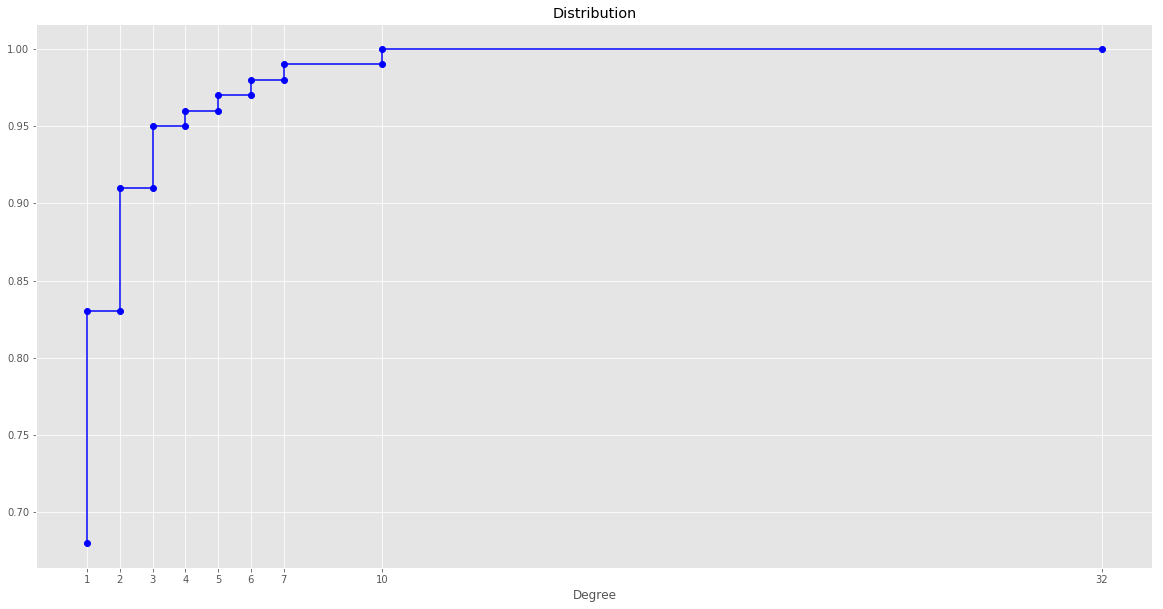

In [335]:
# 2.2.3. Построить кумулятивный график распределения степеней узлов для сети из 2.2.1. , 
# т.е. график CCDF (в обычных и логарифимических (по 2м осям) системах координат).
# кумулятивный график распределения
n = sum(cnt)
probs = [i/n for i in cnt]
cum_prob = []
prob_sum = 0
for prob in probs:
    prob_sum += prob
    cum_prob.append(prob_sum)
fig, ax = plt.subplots(figsize=(20,10))
plt.step(deg, cum_prob, color='b', marker="o")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)
plt.title("Distribution")
plt.xlabel("Degree")
plt.show()

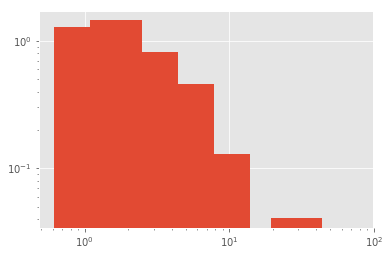

In [365]:
# 2.2.4. Построить распределение с log-binning степеней узлов (в логарифимической (по 2м осям) системе координат)
# для сети из 2.2.1., для сравнения на этом же графике изобразите график плотности распределения.

# log-scaled bins
bins = np.logspace(0, 2, len(deg))
widths = (bins[1:] - bins[:-1])

# Calculate histogram
hist = np.histogram(deg, bins=bins)
# normalize by bin width
hist_norm = hist[0]/widths

# plot it!
plt.bar(bins[:-1], hist_norm, widths)
plt.xscale('log')
plt.yscale('log')
plt.show()